In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def make_half_hexagon(x_path,y_path,cell_size,direction_change_counter):
    if direction_change_counter%2==0:
        angles_array_plot=[np.pi/3, 0, -np.pi/3, 0]
    if direction_change_counter%2==1:
        angles_array_plot=[2*np.pi/3, np.pi, 4*np.pi/3, np.pi]
    for i in range(4):
        x_path.append(x_path[-1]+cell_size*np.cos(angles_array_plot[i]))
        y_path.append(y_path[-1]+cell_size*np.sin(angles_array_plot[i]))

In [4]:
def create_hexagonal_path(x_path,y_path,sample_size,cell_size,nozzle_diameter):
    direction_change_counter=0
    while y_path[-1]<=sample_size or (x_path[-1]>0 and x_path[-1]<=sample_size):
        make_half_hexagon(x_path,y_path,cell_size,direction_change_counter)
         
        if x_path[-1]<=0 and y_path[-1]<=sample_size:
            direction_change_counter+=1
            x_path.append(x_path[-1]+cell_size*np.cos(2*np.pi/3))
            y_path.append(y_path[-1]+cell_size*np.sin(2*np.pi/3))
            
            make_half_hexagon(x_path,y_path,cell_size,direction_change_counter)
              
        if x_path[-1]>=sample_size:
            direction_change_counter+=1
            x_path.append(x_path[-1]+cell_size*np.cos(np.pi/3))
            y_path.append(y_path[-1]+cell_size*np.sin(np.pi/3))
        
            make_half_hexagon(x_path,y_path,cell_size,direction_change_counter)
    return x_path,y_path

In [5]:
def create_hexagonal_printable_path(x_path,y_path,nozzle_diameter):
    x_min=min(x_path)
    x_max=max(x_path)
    n=len(x_path)

    epsilon=0.1

    counter=0
    counter_direction=0

    x_path[0]=nozzle_diameter/2*np.tan(np.pi/6)*(-1)**(counter_direction)
    y_path[0]=nozzle_diameter/2

    for i in range(1,n):
        if x_path[i]>x_min+epsilon and x_path[i]<x_max-epsilon:   
            if counter%4==0:
                x_path[i]-=nozzle_diameter/2*np.tan(np.pi/6)*(-1)**(counter_direction)
                y_path[i]-=nozzle_diameter/2
            if counter%4==1:
                x_path[i]+=nozzle_diameter/2*np.tan(np.pi/6)*(-1)**(counter_direction)
                y_path[i]-=nozzle_diameter/2
            if counter%4==2:
                x_path[i]-=nozzle_diameter/2*np.tan(np.pi/6)*(-1)**(counter_direction)
                y_path[i]+=nozzle_diameter/2
            if counter%4==3:
                x_path[i]+=nozzle_diameter/2*np.tan(np.pi/6)*(-1)**(counter_direction)
                y_path[i]+=nozzle_diameter/2
            counter+=1
        else:
            counter_direction+=1
    
    return x_path,y_path

In [6]:
def make_half_triangle(x_path,y_path,cell_size,direction_change_counter):
    if direction_change_counter%2==0:
        angles_array_plot=[np.pi/3,-np.pi/3]
    if direction_change_counter%2==1:
        angles_array_plot=[-np.pi/3,+np.pi/3]
    
    x_path.append(x_path[-1])
    y_path.append(y_path[-1])
    x_path.append(x_path[-1]+cell_size*np.cos(angles_array_plot[0]))
    y_path.append(y_path[-1]+cell_size*np.sin(angles_array_plot[0]))
    x_path.append(x_path[-1])
    y_path.append(y_path[-1])
    x_path.append(x_path[-1]+cell_size*np.cos(angles_array_plot[1]))
    y_path.append(y_path[-1]+cell_size*np.sin(angles_array_plot[1]))

In [7]:
def create_triangular_path(x_path,y_path,sample_size,cell_size,nozzle_diameter):
    direction_change_counter=0
    while y_path[-1]<=sample_size or (x_path[-1]>0 and x_path[-1]<=sample_size):
        make_half_triangle(x_path,y_path,cell_size,direction_change_counter)
        
        if x_path[-1]>=sample_size and y_path[-1]<=sample_size:
            direction_change_counter+=1
            if direction_change_counter%2==0:
                x_path.append(x_path[-1])
                y_path.append(y_path[-1])
                x_path.append(0)
                y_path.append(y_path[-1])
            
                make_half_triangle(x_path,y_path,cell_size,direction_change_counter)
              
            if direction_change_counter%2==1:
                x_path.append(x_path[-1])
                y_path.append(y_path[-1]+cell_size*np.sin(np.pi/3))
                x_path.append(-0.01)
                y_path.append(y_path[-1])
                x_path.append(0)
                y_path.append(y_path[-1]+cell_size*np.sin(np.pi/3))
        
                make_half_triangle(x_path,y_path,cell_size,direction_change_counter)
    
    return x_path,y_path

In [8]:
def create_triangular_printable_path(x_path,y_path,nozzle_diameter,sample_size):
    x_min=min(x_path)
    x_max=max(x_path)
    n=len(x_path)

    epsilon=0.1

    counter=0
    counter_direction=0

    x_path[0]=nozzle_diameter/2*np.tan(np.pi/6)
    y_path[0]=nozzle_diameter/2

    i=1
    while i<n:
        if x_path[i]>=0 and x_path[i]<x_max-epsilon:
            if counter%4==0:
                x_path[i]+=nozzle_diameter/2*np.tan(np.pi/6)
                y_path[i]+=nozzle_diameter/2*(-1)**(counter_direction)
            if counter%4==1:
                x_path[i]-=nozzle_diameter/2*np.tan(np.pi/6)
                y_path[i]-=nozzle_diameter/2*(-1)**(counter_direction)
            if counter%4==2:
                x_path[i]+=nozzle_diameter/2*np.tan(np.pi/6)
                y_path[i]-=nozzle_diameter/2*(-1)**(counter_direction)
            if counter%4==3:
                x_path[i]-=nozzle_diameter/2*np.tan(np.pi/6)
                y_path[i]+=nozzle_diameter/2*(-1)**(counter_direction)
            counter+=1
            i+=1
        elif i<=n-4:
            if counter_direction%2==0:i+=4
            if counter_direction%2==1:i+=3
            counter_direction+=1
            counter=0
        else:
            i=n
    
    return x_path,y_path

In [9]:
def make_half_square(x_path,y_path,cell_size):   
    x_path.append(x_path[-1]+cell_size)
    y_path.append(y_path[-1])
    x_path.append(x_path[-1])
    y_path.append(y_path[-1]+cell_size)
    x_path.append(x_path[-1])
    y_path.append(y_path[-1])
    x_path.append(x_path[-1])
    y_path.append(y_path[-1]-cell_size)

In [10]:
def create_square_path(x_path,y_path,sample_size,cell_size,nozzle_diameter):
    while y_path[-1]<=sample_size or (x_path[-1]>0 and x_path[-1]<=sample_size):
        make_half_square(x_path,y_path,cell_size)
        
        if x_path[-1]>=sample_size and y_path[-1]<=sample_size:
            x_path.append(x_path[-1]+cell_size)
            y_path.append(y_path[-1])
            x_path.append(x_path[-1])
            y_path.append(y_path[-1]+cell_size)
            x_path.append(0)
            y_path.append(y_path[-1])
            x_path.append(0)
            y_path.append(y_path[-1])
            
            make_half_square(x_path,y_path,cell_size)
    
    return x_path,y_path

In [11]:
def create_square_printable_path(x_path,y_path,nozzle_diameter,sample_size):
    x_min=min(x_path)
    x_max=max(x_path)
    n=len(x_path)

    epsilon=0.1

    counter=0

    i=0
    while i<n:
        if x_path[i]>=0 and x_path[i]<x_max-epsilon:
            if counter%4==0:
                x_path[i]+=nozzle_diameter/2
                y_path[i]+=nozzle_diameter/2
            if counter%4==1:
                x_path[i]-=nozzle_diameter/2
                y_path[i]+=nozzle_diameter/2
            if counter%4==2:
                x_path[i]-=nozzle_diameter/2
                y_path[i]-=nozzle_diameter/2
            if counter%4==3:
                x_path[i]+=nozzle_diameter/2
                y_path[i]-=nozzle_diameter/2
            counter+=1
            i+=1
        elif i<=n-3:
            y_path[i]+=nozzle_diameter/2
            x_path[i+2]+=nozzle_diameter/2
            i+=3
            counter=0
        else:
            i=n
    
    return x_path,y_path

In [12]:
def interpolate_path(x_path,y_path,cell_size,nb_pts):
    x_interpolate=[]
    y_interpolate=[]
    n=len(x_path)
    for i in range(n-1):
        for j in range((nb_pts+1)):
            x_interpolate.append(x_path[i]+(x_path[i+1]-x_path[i])*j/(nb_pts+1))
            y_interpolate.append(y_path[i]+(y_path[i+1]-y_path[i])*j/(nb_pts+1))
    return x_interpolate,y_interpolate

In [13]:
def cut_path(x_interpolate,y_interpolate,sample_size,epsilon):
    n=len(x_interpolate)
    x=[]
    y=[]
    for i in range(0,n):
        if x_interpolate[i]>0+epsilon and x_interpolate[i]<sample_size-epsilon and y_interpolate[i]>0+epsilon and y_interpolate[i]<sample_size-epsilon:  
            x.append(round(x_interpolate[i], 2))
            y.append(round(y_interpolate[i], 2))
    return x,y

In [14]:
def finish_path(x,y,sample_size,nozzle_diameter):
    if x[-1]<=sample_size/2:
        x.append(0)
        y.append(sample_size)
        x.append(sample_size)
        y.append(sample_size)
        x.append(sample_size)
        y.append(0)
        x.append(0)
        y.append(0)
        x.append(0)
        y.append(sample_size-nozzle_diameter/3)
    else:
        x.append(sample_size)
        y.append(sample_size)
        x.append(sample_size)
        y.append(0)
        x.append(0)
        y.append(0)
        x.append(0)
        y.append(sample_size)
        x.append(sample_size-nozzle_diameter/3)
        y.append(sample_size)
    return x,y

In [15]:
def design_path(lattice_type,sample_size,cell_size,nozzle_diameter):
    #First we will display the desired lattice structure
    
    #variable initialization
    x_path=[0]
    y_path=[0]
    
    if lattice_type==0:
        x_path,y_path=create_hexagonal_path(x_path,y_path,sample_size,cell_size,nozzle_diameter)
  
        plt.figure()
        plt.grid()
        plt.quiver(x_path[:-1], y_path[:-1],[x_path[i+1]-x_path[i] for i in range(len(x_path)-1)], [y_path[i+1]-y_path[i] for i in range(len(y_path)-1)], scale_units='xy', angles='xy', scale=1)
        plt.show()

        x_path,y_path=create_hexagonal_printable_path(x_path,y_path,nozzle_diameter)


    if lattice_type==1:
        x_path,y_path=create_triangular_path(x_path,y_path,sample_size,cell_size,nozzle_diameter)
  
        plt.figure()
        plt.grid()
        plt.quiver(x_path[:-1], y_path[:-1],[x_path[i+1]-x_path[i] for i in range(len(x_path)-1)], [y_path[i+1]-y_path[i] for i in range(len(y_path)-1)], scale_units='xy', angles='xy', scale=1)
        plt.show()

        x_path,y_path=create_triangular_printable_path(x_path,y_path,nozzle_diameter,sample_size)
    
    if lattice_type==2:
        x_path,y_path=create_square_path(x_path,y_path,sample_size,cell_size,nozzle_diameter)
  
        plt.figure()
        plt.grid()
        plt.quiver(x_path[:-1], y_path[:-1],[x_path[i+1]-x_path[i] for i in range(len(x_path)-1)], [y_path[i+1]-y_path[i] for i in range(len(y_path)-1)], scale_units='xy', angles='xy', scale=1)
        plt.show()

        x_path,y_path=create_square_printable_path(x_path,y_path,nozzle_diameter,sample_size)

    plt.figure()
    plt.grid()
    plt.quiver(x_path[:-1], y_path[:-1],[x_path[i+1]-x_path[i] for i in range(len(x_path)-1)], [y_path[i+1]-y_path[i] for i in range(len(y_path)-1)], scale_units='xy', angles='xy', scale=1)
    plt.show()
    
    interpolate_param=10
    x_interpolate,y_interpolate=interpolate_path(x_path,y_path,cell_size,interpolate_param)
    epsilon=nozzle_diameter/4
    x,y=cut_path(x_interpolate,y_interpolate,sample_size,epsilon)
    
    x,y=finish_path(x,y,sample_size,nozzle_diameter)
    
    plt.figure()
    plt.grid()
    plt.quiver(x[:-1], y[:-1],[x[i+1]-x[i] for i in range(len(x)-1)], [y[i+1]-y[i] for i in range(len(y)-1)], scale_units='xy', angles='xy', scale=1)
    plt.xlim(-1, sample_size+1)
    plt.ylim(-1, sample_size+1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    
    return x,y

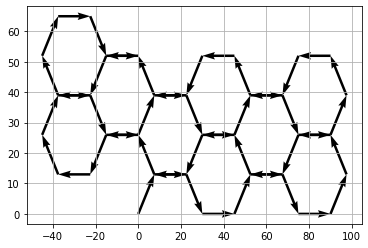

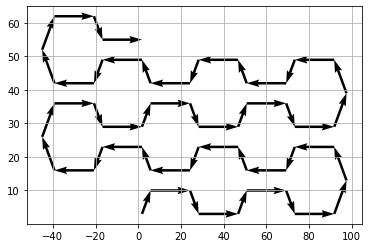

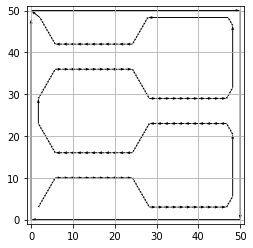

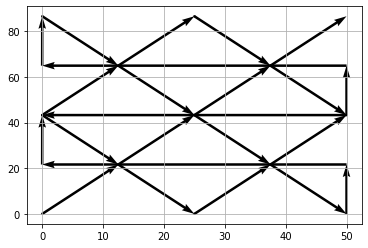

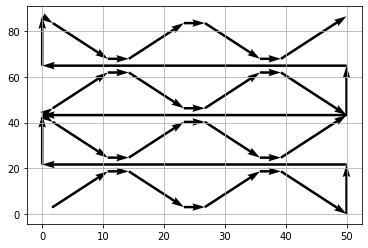

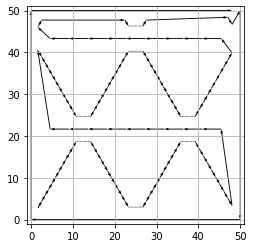

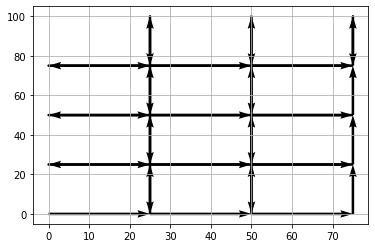

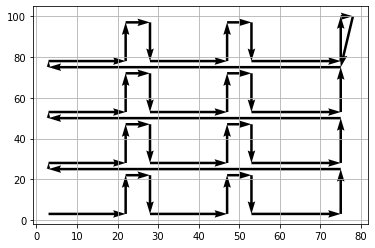

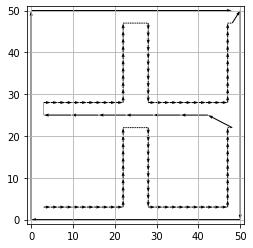

In [20]:
x,y=design_path(0,50,15,6)
x,y=design_path(1,50,25,6)
x,y=design_path(2,50,25,6)

In [17]:
def extrusion_rate_calculation(x,y):
    n=len(x)
    extrusion_rate_array=[0]
    for i in range(1,n):
        dist=np.sqrt((x[i]-x[i-1])**2+(y[i]-y[i-1])**2)
        extrusion_rate=round(dist, 2)
        extrusion_rate_array.append(extrusion_rate)
    return extrusion_rate_array

In [21]:
def generate_gcode(x,y,layer_height,sample_size):
    n=len(x)
    extrusion_rate_array=extrusion_rate_calculation(x,y)
    with open('gcode.txt', 'w') as f:
        for layer in range(int(sample_size/layer_height)):
            if layer%2==0:
                for i in range(0,n,1):
                    f.write("X" + str(x[i]) +" Y" + str(y[i]) +" Z" + str(layer*layer_height) + " E" + str(extrusion_rate_array[i]) + "\n")
            if layer%2==1:
                for i in range(n-1,-1,-1):
                    extrusion_rate=extrusion_rate_array[i]
                    if i==n-1:extrusion_rate=0
                    f.write("X" + str(x[i]) +" Y" + str(y[i]) +" Z" + str(layer*layer_height) + " E" + str(extrusion_rate) + "\n")

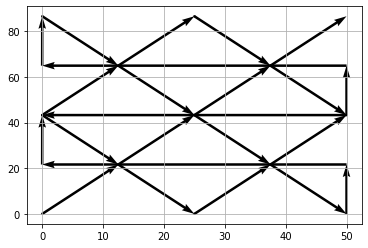

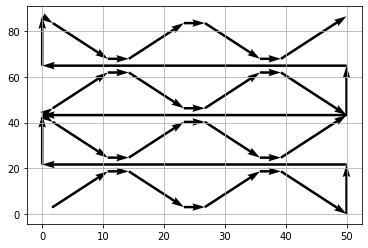

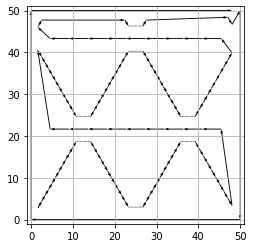

In [26]:
#x,y=design_path(0,50,15,6)
x,y=design_path(1,50,25,6)
#x,y=design_path(2,50,25,6)
generate_gcode(x,y,4,50)